In [1]:
# Importing packages
import pandas as pd
import numpy as np

In [2]:
# Loading data from CSV
df = pd.read_csv("data/cwur_2025.csv", encoding="utf-8")

In [3]:
# Inspecting the data part I
df.head()

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1 Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2 Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,2,11,96.8
2,3 Top 0.1%,Stanford University,USA,3,10,4,3,4,95.2
3,4 Top 0.1%,University of Cambridge,United Kingdom,1,2,26,4,14,94.1
4,5 Top 0.1%,University of Oxford,United Kingdom,2,7,28,9,6,93.3


In [4]:
# Inspecting the data part II
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   Institution         2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Education Rank      2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        1971 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [5]:
# Handling missing data
# Checking for null values
null_counts = df.isnull().sum()
print(null_counts)

World Rank             0
Institution            0
Location               0
National Rank          0
Education Rank         0
Employability Rank     0
Faculty Rank          29
Research Rank          0
Score                  0
dtype: int64


In [6]:
# Expressing missing data as a percentage
null_percentage = df.isnull().mean() * 100
print(null_percentage)

World Rank            0.00
Institution           0.00
Location              0.00
National Rank         0.00
Education Rank        0.00
Employability Rank    0.00
Faculty Rank          1.45
Research Rank         0.00
Score                 0.00
dtype: float64


In [7]:
# Inspecting the rows with missing data
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls.head()

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
67,68 Top 0.4%,Zhejiang University,China,5,-,373,NaN,20,83.5
142,143 Top 0.7%,Yonsei University,South Korea,2,-,79,NaN,133,80.4
213,214 Top 1%,Zhengzhou University,China,30,-,1220,NaN,152,78.6
451,452 Top 2.2%,Zhejiang University of Technology,China,72,-,1085,NaN,427,75.0
489,490 Top 2.3%,York University,Canada,18,-,321,NaN,477,74.5


<Axes: >

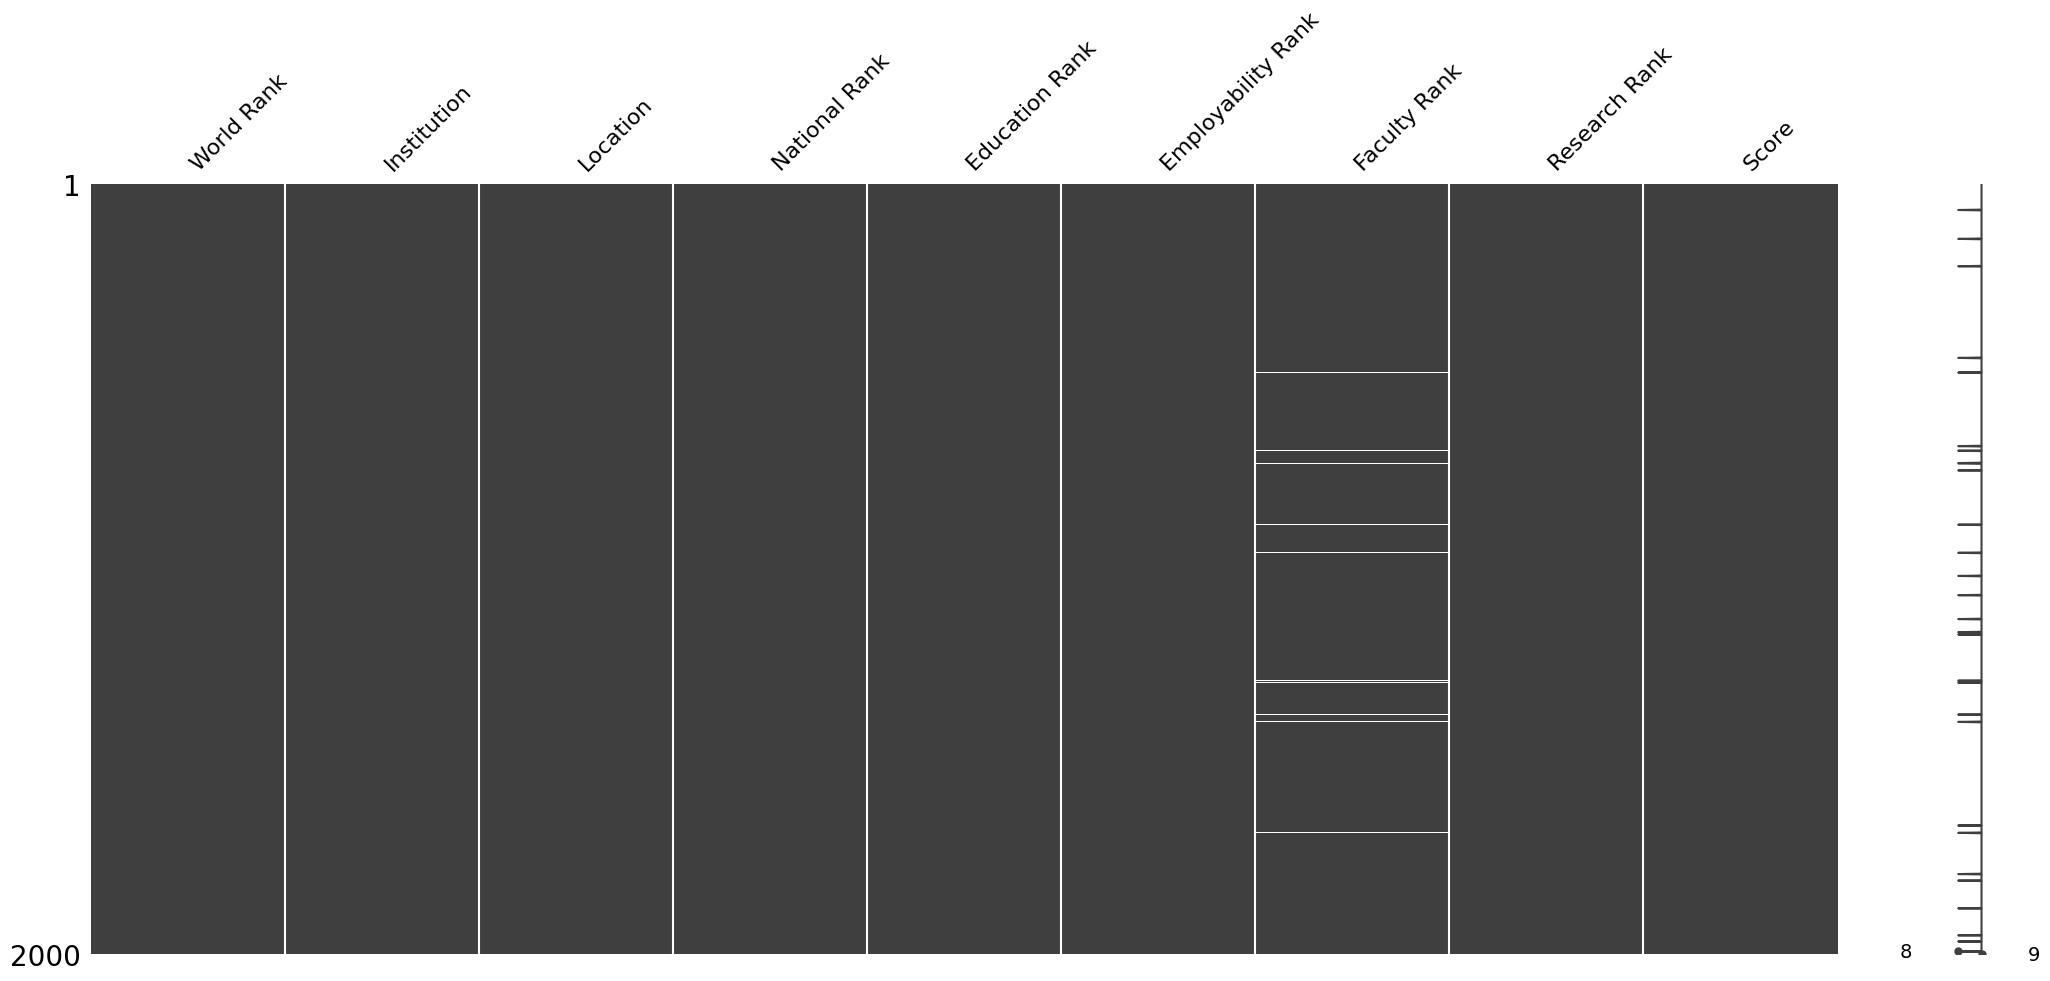

In [8]:
# Visualizing missing data
import missingno as msno
msno.matrix(df)

In [9]:
# Rows with missing data are not concentratd
# Rows with missing data represent only 1.45% of the dataset, on one feature ["Faculty Rank"]
# Dropping the rows with missing data
df_clean = df.dropna()
print(df_clean.isnull().sum())

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64


In [10]:
# Keeping this in quick view
df_clean.head()

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1 Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2 Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,2,11,96.8
2,3 Top 0.1%,Stanford University,USA,3,10,4,3,4,95.2
3,4 Top 0.1%,University of Cambridge,United Kingdom,1,2,26,4,14,94.1
4,5 Top 0.1%,University of Oxford,United Kingdom,2,7,28,9,6,93.3


In [11]:
# Viewing the datatypes
print(df_clean.dtypes)

World Rank             object
Institution            object
Location               object
National Rank           int64
Education Rank         object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object


In [12]:
# Data type conversion
# "National Rank" is an integer
# The columns "Education Rank", "Employability Rank", "Faculty Rank", and "Research Rank" 
# appear to be similar to "National Rank", but are categorical not integer
# I'll explore this a little more, then decide if this should be changed to integer

cols_to_convert = ["Education Rank", "Employability Rank", "Faculty Rank", "Research Rank"]

for col in cols_to_convert:
    print(f"\n--- {col} ---")
    counts = df_clean[col].value_counts(dropna=False)
    percentages = df_clean[col].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({"Count": counts, "Percentage": percentages.round(2)})
    print(summary)


--- Education Rank ---
                Count  Percentage
Education Rank                   
-                1526       77.42
5                   1        0.05
16                  1        0.05
12                  1        0.05
6                   1        0.05
...               ...         ...
74                  1        0.05
27                  1        0.05
66                  1        0.05
250                 1        0.05
2                   1        0.05

[446 rows x 2 columns]

--- Employability Rank ---
                    Count  Percentage
Employability Rank                   
-                     950       48.20
1672                    2        0.10
1715                    2        0.10
26                      1        0.05
28                      1        0.05
...                   ...         ...
523                     1        0.05
575                     1        0.05
159                     1        0.05
74                      1        0.05
1223                    1 

In [13]:
# Replacing the non-numeric value "-" with NaN
df_clean = df_clean.copy()

for col in cols_to_convert:
    df_clean[col] = (
        df_clean[col]
        .replace("-", np.nan)
        .astype("Int64")
    )
    
print(df_clean.dtypes)

World Rank             object
Institution            object
Location               object
National Rank           int64
Education Rank          Int64
Employability Rank      Int64
Faculty Rank            Int64
Research Rank           Int64
Score                 float64
dtype: object


In [14]:
# Keeping this in quick view, again
df_clean.head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1 Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2 Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,2,11,96.8
2,3 Top 0.1%,Stanford University,USA,3,10,4,3,4,95.2
3,4 Top 0.1%,University of Cambridge,United Kingdom,1,2,26,4,14,94.1
4,5 Top 0.1%,University of Oxford,United Kingdom,2,7,28,9,6,93.3
5,6 Top 0.1%,Princeton University,USA,4,5,15,8,87,92.7
6,7 Top 0.1%,University of Pennsylvania,USA,5,16,7,29,12,92.1
7,8 Top 0.1%,Columbia University,USA,6,12,14,10,15,91.6
8,9 Top 0.1%,Yale University,USA,7,6,31,14,24,91.2
9,10 Top 0.1%,University of Chicago,USA,8,8,16,22,50,90.8


In [15]:
# Extracting only the numeric part of the "World Rank" column before the first space
df_clean["Rank Number"] = df_clean["World Rank"].str.split(" ", n=1, expand=True)[0]

# Converting to integer and assigning to a new column
df_clean["Rank Number"] = pd.to_numeric(df_clean["Rank Number"], errors="coerce").astype("Int64")

# Dropping the original "World Rank" column
df_clean = df_clean.drop(columns=["World Rank"])

# Moving the new "Rank Number" column to the index 0
cols = df_clean.columns.tolist()
cols.remove("Rank Number")
new_order = ["Rank Number"] + cols
df_clean = df_clean[new_order]

# Preview
df_clean.head(20)


,Rank Number,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,11,96.8
2,3,Stanford University,USA,3,10,4,3,4,95.2
3,4,University of Cambridge,United Kingdom,1,2,26,4,14,94.1
4,5,University of Oxford,United Kingdom,2,7,28,9,6,93.3
5,6,Princeton University,USA,4,5,15,8,87,92.7
6,7,University of Pennsylvania,USA,5,16,7,29,12,92.1
7,8,Columbia University,USA,6,12,14,10,15,91.6
8,9,Yale University,USA,7,6,31,14,24,91.2
9,10,University of Chicago,USA,8,8,16,22,50,90.8


In [16]:
# Creating a new "Global_Region" column based on the "Location" column
# Importing the country_converter package
# This contains a 6-continent classification with Africa, Antarctica, Asia, Europe, America, Oceania
# Documentation: https://github.com/IndEcol/country_converter?tab=readme-ov-file#classification-schemes

import country_converter as coco

# Makes more sense at this point to call the "Location" the "Country" instead
df_clean = df_clean.rename(columns={"Location": "Country"})

# Mapping "Country" to continent_name using the country_converter package
df_clean["Global_Region"] = coco.convert(
    names = df_clean["Country"],
    to = "continent"  
)

# Preview
df_clean.head(20)

,Rank Number,Institution,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score,Global_Region
0,1,Harvard University,USA,1,1,1,1,1,100.0,America
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,11,96.8,America
2,3,Stanford University,USA,3,10,4,3,4,95.2,America
3,4,University of Cambridge,United Kingdom,1,2,26,4,14,94.1,Europe
4,5,University of Oxford,United Kingdom,2,7,28,9,6,93.3,Europe
5,6,Princeton University,USA,4,5,15,8,87,92.7,America
6,7,University of Pennsylvania,USA,5,16,7,29,12,92.1,America
7,8,Columbia University,USA,6,12,14,10,15,91.6,America
8,9,Yale University,USA,7,6,31,14,24,91.2,America
9,10,University of Chicago,USA,8,8,16,22,50,90.8,America


In [17]:
# Checking for unmapped countries
unmapped = df_clean[df_clean["Global_Region"].isna()]["Country"].unique()
print("Unmapped countries:", unmapped)

Unmapped countries: []


In [18]:
# Exploring for a moment the new Global_Region column
region_counts_pct = df_clean["Global_Region"].value_counts(normalize=True) * 100
print(region_counts_pct)

Global_Region
Asia       39.776763
Europe     31.405378
America    23.287671
Africa      3.145611
Oceania     2.384576
Name: proportion, dtype: float64


In [19]:
df_clean["Score"].describe()

count    1971.000000
mean       71.971030
std         5.001134
min        66.200000
25%        68.100000
50%        70.600000
75%        74.450000
max       100.000000
Name: Score, dtype: float64

In [20]:
# Creating a normalized numeric column by scaling "Score" to a range between 0 and 1
# First inspecting the "Score" column
df_clean["Score"].describe()

count    1971.000000
mean       71.971030
std         5.001134
min        66.200000
25%        68.100000
50%        70.600000
75%        74.450000
max       100.000000
Name: Score, dtype: float64

In [21]:
# Scaling the "Score" column
df_clean["Overall_Score_Normalized"] = (
    df_clean["Score"] - df_clean["Score"].min()
) / (df_clean["Score"].max() - df_clean["Score"].min())

# Checking the result
df_clean[["Score", "Overall_Score_Normalized"]].head(20)

,Score,Overall_Score_Normalized
0,100.0,1.000000
1,96.8,0.905325
2,95.2,0.857988
3,94.1,0.825444
4,93.3,0.801775
5,92.7,0.784024
6,92.1,0.766272
7,91.6,0.751479
8,91.2,0.739645
9,90.8,0.727811


In [34]:
# Ensuring the final DataFrame has no duplicates and all primary keys are unique.
# Checking for duplicates in the Institution column
duplicate_institutions = df_clean["Institution"].duplicated()
print("Number of duplicate University entries:", duplicate_institutions.sum())


Number of duplicate University entries: 0


In [22]:
# Expressing missing data as a percentage
null_percentage_cleaned = df_clean.isnull().mean() * 100
print(null_percentage_cleaned)

Rank Number                  0.000000
Institution                  0.000000
Country                      0.000000
National Rank                0.000000
Education Rank              77.422628
Employability Rank          48.198884
Faculty Rank                85.895485
Research Rank                3.450025
Score                        0.000000
Global_Region                0.000000
Overall_Score_Normalized     0.000000
dtype: float64


In [23]:
df_clean[["Education Rank", "Employability Rank", "Faculty Rank", "Research Rank"]].describe()

,Education Rank,Employability Rank,Faculty Rank,Research Rank
count,445.0,1021.0,278.0,1903.0
mean,275.523596,805.795299,142.017986,964.773516
std,170.208358,523.577292,83.550303,557.917757
min,1.0,1.0,1.0,1.0
25%,120.0,349.0,70.25,481.5
50%,268.0,786.0,140.5,964.0
75%,430.0,1251.0,213.75,1447.5
max,566.0,1753.0,290.0,1996.0


In [30]:
import plotly.express as px
from scipy import stats

In [25]:
rank_cols = ["Education Rank", "Employability Rank", "Faculty Rank", "Research Rank"]

In [ ]:
summary_list = []

for col in rank_cols:
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    
    # Mode may return multiple values; take the first one
    mode_val = df_clean[col].mode()
    mode_val = mode_val[0] if not mode_val.empty else None
    
    summary_list.append({
        "Column": col,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": mode_val
    })


# Convert to DataFrame
summary_df = pd.DataFrame(summary_list)


summary_df

,Column,Mean,Median,Mode
0,Education Rank,275.523596,268.0,1
1,Employability Rank,805.795299,786.0,1672
2,Faculty Rank,142.017986,140.5,109
3,Research Rank,964.773516,964.0,1


In [31]:
df_long = df_clean[rank_cols].melt(var_name="Ranking Metric", value_name="Rank Value")

fig = px.box(
    df_long,
    x="Ranking Metric",
    y="Rank Value",
    points="all",  # show all points for outliers
    color="Ranking Metric",
    title="Distribution of CWUR Ranking Metrics (Box Plot)"
)

fig.show()


In [35]:
# importing path library
from pathlib import Path

# Saving the final dataframe in CSV format
output_path = Path("data") / "cwur_2025_cleaned.csv"
output_path.parent.mkdir(exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Saved data to {output_path}")

Saved data to data/cwur_2025_cleaned.csv
